In [1]:
import nbimporter
from data_preparation import *
from cultural_clustering import * 

Importing Jupyter notebook from data_preparation.ipynb
Importing Jupyter notebook from cultural_clustering.ipynb


In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import colorlover as cl
import plotly_express as px

import spacy
spacy.load('es')
spacy.load('en')
spacy.load('fr')
from spacy.lang.es import Spanish
from spacy.lang.en import English
from spacy.lang.fr import French
parser_esp = Spanish()
parser_fr = French()
parser_en = English()

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
es_stop = set(nltk.corpus.stopwords.words('spanish'))
en_stop = set(nltk.corpus.stopwords.words('english'))
fr_stop = set(nltk.corpus.stopwords.words('french'))

spacy_stopwords_esp = spacy.lang.es.stop_words.STOP_WORDS
spacy_stopwords_en = spacy.lang.en.stop_words.STOP_WORDS
spacy_stopwords_fr = spacy.lang.fr.stop_words.STOP_WORDS

from langdetect import detect
from wordcloud import WordCloud

import random

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
dataframe_all_en = get_dataframe_analysis_en(True)
dataframe_all_en.head()
dataframe_all_text_en = get_dataframe_analysis_en(False)
dataframe_all_text_en.head()

Age  \
0   37   
1   62   
2   28   
3   31   
4   24   

  Are you able to express verbally the emotions produced by an image you have seen?  \
0                                    3. Occasionally                                  
1                                    3. Occasionally                                  
2                                    3. Occasionally                                  
3                                    3. Occasionally                                  
4                                     2. Very rarely                                  

  By reusing an image, can you redefine the message that the sender has thought about?  \
0                                                Yes                                     
1                                                Yes                                     
2                                                Yes                                     
3                                                Yes                                     
4                            Do not know / No answer                                     

  Classify your degree of vision  \
0                      3. Medium   
1                      3. Medium   
2                        4. Good   
3                        4. Good   
4                        4. Good   

             Do you find this image attractive? Why?  \
0                Si, el puente que sostiene al tren    
1  Serviría para ilustrar una historia. Quizá una...   
2  No, no encuentro enfocados elementos que me at...   
3  No. No me gusta que se vean las obras al fondo...   
4                    No, me transmite mucha tristeza   

        Do you find this image attractive? Why?       \
0                           No, me provoca angustia    
1                       Broma de chocolate con leche   
2  Sí, es muy curioso el contraste de colores ent...   
3  No. Me parece divertida y original, pero no la...   
4        No, porque la persona sale haciendo el bobo   

           Do you find this image attractive? Why?.1  \
0                                No, no me interesa    
1  Texturas, personas, no sabemos quienes pero el...   
2  Sí, me causa curiosidad la situación que se va...   
3  No. No me gusta la Semana Santa aunque ciertam...   
4                                                 Si   

           Do you find this image attractive? Why?.2  \
0               No, demasiado color y no.me.interesa   
1  Exhuberancia se recrea en la iconografia  con ...   
2  Sí, el color y las metáforas que recoge están ...   
3  No. Me parece que es recargada, que no está bi...   
4                     Si, por los colores llamativos   

           Do you find this image attractive? Why?.3  \
0            Si, por el efecto del cohete en la mano   
1  No se discute la hombría de quién de modo tan ...   
2  Sí, el lanzamiento de cohete con el humo y la ...   
3  Sí, me parece que captura el momento, la celeb...   
4                                                 No   

  Do you have access to devices (computer, mobile, tablet, etc.) connected to the Internet usually?  \
0                             5. Several times a day                                                  
1                             5. Several times a day                                                  
2                             5. Several times a day                                                  
3                             5. Several times a day                                                  
4                             5. Several times a day                                                  

                                                                                   ...                                                                                    \
0                                                                                  ...                                                                                     
1            

In [4]:
dataframe_all_esp = get_dataframe_analysis_esp(True)
dataframe_all_esp.head()
dataframe_all_text_esp = get_dataframe_analysis_esp(False)
dataframe_all_text_esp.head()

Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado?  \
0                                                 Sí                                       
1                                                 Sí                                       
2                                                 Sí                                       
3                                                 Sí                                       
4                                              NS/NC                                       

  Clasifica tu grado de visión  \
0                   3. Regular   
1                   3. Regular   
2                     4. Bueno   
3                     4. Bueno   
4                     4. Bueno   

  Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)?  \
0                                           1. Nunca                                                                                                                                                 
1                                    3. En ocasiones                                                                                                                                                 
2                                    3. En ocasiones                                                                                                                                                 
3                          5. Casi siempre o siempre                                                                                                                                                 
4                                 4. Bastantes veces                                                                                                                                                 

  Cuando compartes imágenes, ¿habitualmente las envías a otras personas?  \
0                                    3. En ocasiones                       
1                          5. Casi siempre o siempre                       
2                                    3. En ocasiones                       
3                                 4. Bastantes veces                       
4                                 4. Bastantes veces                       

  Cuando compartes imágenes, ¿habitualmente las produces tú?  \
0         4. Muchas veces envío imágenes que hago yo           
1         4. Muchas veces envío imágenes que hago yo           
2         4. Muchas veces envío imágenes que hago yo           
3         4. Muchas veces envío imágenes que hago yo           
4  3. A veces envío imágenes que hago yo y otras ...           

  Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?  \
0                                    3. En ocasiones                         
1                          5. Casi siempre o siempre                         
2                                 4. Bastantes veces                         
3                                 2. Muy pocas veces                         
4                                 4. Bastantes veces                         

  Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]  \
0                                                 No                                                    
1                                                 No                                                    
2                                                 No                                                    
3                                                 Sí                                                    
4                                                 Sí                                                    

  Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]  \
0        

In [5]:
def visualize_reception_images_all_esp(dataframe):
    newDataframe = dataframe.copy()
    for column in get_reception_image_items_esp():
        try:
            if column != '¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [Otro]':
                print(f'Describiendo la pregunta {column}')
                dict_item = get_data_replacements(str(column))
                if dict_item:
                    newDataframe[column] = newDataframe[column].apply(get_data_replacements(str(column)).get)
                display(newDataframe[column].describe())
                print(
                    f'Conteo de cada valor en {column} expresada como valor / cantidad')
                display(newDataframe[column].value_counts().sort_index())
                print(
                    f'Porcentaje de cada valor en {column} expresado como valor / porcentaje')
                display(newDataframe[column].value_counts(normalize=True).sort_index().round(4) * 100)
                # sns.distplot(workCleanDummiesCluster.loc[workCleanDummiesCluster['cluster'] == selected_cluster][column], kde=False, rug=True);
                data = [go.Bar(x=sorted(newDataframe[column].unique()),
                               y=newDataframe[column].value_counts().reindex(
                                   newDataframe[column].unique(), fill_value=0).sort_index(),
                               marker=dict(color=cl.scales['6']['div']['Spectral']))]

                iplot(data)
                plt.show()
        except BaseException:
            pass

In [6]:
def visualize_reception_images_all_en(dataframe):
    newDataframe = dataframe.copy()
    for column in get_reception_image_items_en():
        try:
            if column != 'What kind of applications do you use on your computer/ tablet/ mobile? (Multiple answer) [Other]':
                print(f'Describing the feature {column}')
                dict_item = get_data_replacements(str(column))
                if dict_item:
                    newDataframe[column] = newDataframe[column].apply(get_data_replacements(str(column)).get)
                display(newDataframe[column].describe())
                print(
                    f'Count of each value in {column} expresed as value / amount')
                display(newDataframe[column].value_counts().sort_index())
                print(
                    f'Percentage of each value in {column} expresed as value / percentage')
                display(newDataframe[column].value_counts(normalize=True).sort_index().round(4) * 100)
                # sns.distplot(workCleanDummiesCluster.loc[workCleanDummiesCluster['cluster'] == selected_cluster][column], kde=False, rug=True);
                display(newDataframe[column].value_counts(normalize=True).sort_index().round(4) * 100)
                # sns.distplot(workCleanDummiesCluster.loc[workCleanDummiesCluster['cluster'] == selected_cluster][column], kde=False, rug=True);
                data = [go.Bar(x=sorted(newDataframe[column].unique()),
                               y=newDataframe[column].value_counts().reindex(
                                   newDataframe[column].unique(), fill_value=0).sort_index(),
                               marker=dict(color=cl.scales['6']['div']['Spectral']))]

                iplot(data)
                plt.show()
        except BaseException:
            pass

In [7]:
def tokenize(text, language):
    lda_tokens = []
    if language == 'es':
        tokens = parser_esp(str(text))
    elif language == 'en':
        tokens = parser_en(str(text))
    elif language == 'fr':
        tokens = parser_fr(str(text))

    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma


def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)


def prepare_text_for_lda(text, language):
    tokens = tokenize(text, language)
    tokens = [token for token in tokens if len(token) > 4]
    # tokens = [token for token in tokens if token not in es_stop]
    if language == 'es':
        tokens = [token for token in tokens if token not in es_stop]
    elif language == 'en':
        tokens = [token for token in tokens if token not in en_stop]
    elif language == 'fr':
        tokens = [token for token in tokens if token not in fr_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(30, 60)

def visualize_text_responses_esp(dataframe, column):
    newDataframe = dataframe.copy()
    response_column = 'tokens-visual-issues-esp'
    print(f'Describiendo la variable: {column}')
    n_responses = newDataframe[column].count()
    print(f'Número de respuestas: {n_responses} ')

    if n_responses > 0:
        list_responses = []
        for line in newDataframe[column]:
            lang = detect(str(line))
            if lang == 'es':
                tokens = prepare_text_for_lda(line, 'es')
            elif lang == 'en':
                tokens = prepare_text_for_lda(line, 'en')
            elif lang == 'fr':
                tokens = prepare_text_for_lda(line, 'fr')
            else:
                tokens = prepare_text_for_lda(line, 'en')

            # tokens = [token.text for token in doc if not token.is_stop]

            # word.lemma_
            list_responses.append(tokens)

        m = np.asarray(list_responses)
        newDataframe[response_column] = m

        # print(list_responses)
        list_responses2 = list(
            filter(lambda a: str(a) != "['nan']", list_responses))
        # print(list_responses2)

        all_responses = []

        for sublist in list_responses2:
            for item in sublist:
                all_responses.append(item)

        # responses_series = pd.Series((v[0] for v in list_responses))
        responses_series = pd.Series(all_responses)
        # print(responses_series)

        # display(responses_series.str.lower().value_counts())

        data = [go.Bar(x=sorted(responses_series.str.lower().unique()),
                       y=responses_series.str.lower().value_counts().reindex(
            responses_series.str.lower().unique(), fill_value=0).sort_index(),
            marker=dict(color=cl.interp(cl.scales['9']['div']['Spectral'], responses_series.str.lower().nunique())))]

        iplot(data)
        plt.show()
        # print(all_responses)
        all_responses_text = ' '.join(all_responses)
        # display(all_responses_text)
        wordcloud = WordCloud(font_path='/home/jovyan/fonts/Dosis-Regular.ttf', background_color="white", prefer_horizontal=1, width=800, height=400).generate(all_responses_text)
        # generate word cloud
        # display(responses_series.str.lower().value_counts().to_dict())
        wordcloud.generate_from_frequencies(
            responses_series.str.lower().value_counts().to_dict())

        # show
        print('Wordcloud')
        plt.figure(figsize = (100, 50))
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
        plt.axis("off")
        plt.show()

In [8]:
def compare_reception_images_multiple_resp_esp(dataframe, items, exclude, x_axis_names):
    temp_dataframe = dataframe.copy()

    if type(exclude) == list:
        items = list(set(items) - set(exclude))
    else:
        items.remove(exclude)

    yes_list = []
    for column in items:
        yes_list.append(temp_dataframe[temp_dataframe[column] == 1][column].count())
    # print(yes_list)
    
    data = [go.Bar(
        x=items,
        y=yes_list,
        marker=dict(color=cl.scales['6']['div']['Spectral']),
    )]
    
    layout = go.Layout(
        barmode='group',
        xaxis=go.layout.XAxis(
            ticktext=x_axis_names,
            tickvals=items,
            title='Opciones de respuesta múltiple'
        ),
        yaxis=go.layout.YAxis(
            title="Total respuestas afirmativas"),
        bargap=0.2,
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    plt.show()

In [9]:
def compare_reception_images_multiple_resp_en(dataframe, items, exclude, x_axis_names):
    temp_dataframe = dataframe.copy()

    if type(exclude) == list:
        items = list(set(items) - set(exclude))
    else:
        items.remove(exclude)

    yes_list = []
    for column in items:
        yes_list.append(temp_dataframe[temp_dataframe[column] == 1][column].count())
    # print(yes_list)
    
    data = [go.Bar(
        x=items,
        y=yes_list,
        marker=dict(color=cl.scales['6']['div']['Spectral']),
    )]
    
    layout = go.Layout(
        barmode='group',
        xaxis=go.layout.XAxis(
            ticktext=x_axis_names,
            tickvals=items,
            title='Options for multiple responses'
        ),
        yaxis=go.layout.YAxis(
            title="Total affirmative answers"),
        bargap=0.2,
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    plt.show()

In [10]:
visualize_reception_images_all_esp(dataframe_all_esp)

Describiendo la pregunta Clasifica tu grado de visión


count          767
unique           5
top       4. Bueno
freq           334
Name: Clasifica tu grado de visión, dtype: object

Conteo de cada valor en Clasifica tu grado de visión expresada como valor / cantidad


1. Muy malo       4
2. Malo          28
3. Regular      155
4. Bueno        334
5. Muy bueno    246
Name: Clasifica tu grado de visión, dtype: int64

Porcentaje de cada valor en Clasifica tu grado de visión expresado como valor / porcentaje


1. Muy malo      0.52
2. Malo          3.65
3. Regular      20.21
4. Bueno        43.55
5. Muy bueno    32.07
Name: Clasifica tu grado de visión, dtype: float64

Describiendo la pregunta ¿Utilizas gafas o lentes de contacto?


count     767
unique      2
top        Sí
freq      397
Name: ¿Utilizas gafas o lentes de contacto?, dtype: object

Conteo de cada valor en ¿Utilizas gafas o lentes de contacto? expresada como valor / cantidad


No    370
Sí    397
Name: ¿Utilizas gafas o lentes de contacto?, dtype: int64

Porcentaje de cada valor en ¿Utilizas gafas o lentes de contacto? expresado como valor / porcentaje


No    48.24
Sí    51.76
Name: ¿Utilizas gafas o lentes de contacto?, dtype: float64

Describiendo la pregunta ¿Tienes alguna carencia visual que afecte a la recepción de formas, colores, distancias, etc.?


count     767
unique      2
top        No
freq      647
Name: ¿Tienes alguna carencia visual que afecte a la recepción de formas, colores, distancias, etc.?, dtype: object

Conteo de cada valor en ¿Tienes alguna carencia visual que afecte a la recepción de formas, colores, distancias, etc.? expresada como valor / cantidad


No    647
Sí    120
Name: ¿Tienes alguna carencia visual que afecte a la recepción de formas, colores, distancias, etc.?, dtype: int64

Porcentaje de cada valor en ¿Tienes alguna carencia visual que afecte a la recepción de formas, colores, distancias, etc.? expresado como valor / porcentaje


No    84.35
Sí    15.65
Name: ¿Tienes alguna carencia visual que afecte a la recepción de formas, colores, distancias, etc.?, dtype: float64

Describiendo la pregunta ¿Tienes acceso a dispositivos (ordenador, móvil, tablet, etc.) conectados a Internet habitualmente?


count                        767
unique                         5
top       5. Varias veces al día
freq                         560
Name: ¿Tienes acceso a dispositivos (ordenador, móvil, tablet, etc.) conectados a Internet habitualmente?, dtype: object

Conteo de cada valor en ¿Tienes acceso a dispositivos (ordenador, móvil, tablet, etc.) conectados a Internet habitualmente? expresada como valor / cantidad


1. Nunca                    1
2. Ocasionalmente           8
3. Semanalmente            28
4. Diariamente            170
5. Varias veces al día    560
Name: ¿Tienes acceso a dispositivos (ordenador, móvil, tablet, etc.) conectados a Internet habitualmente?, dtype: int64

Porcentaje de cada valor en ¿Tienes acceso a dispositivos (ordenador, móvil, tablet, etc.) conectados a Internet habitualmente? expresado como valor / porcentaje


1. Nunca                   0.13
2. Ocasionalmente          1.04
3. Semanalmente            3.65
4. Diariamente            22.16
5. Varias veces al día    73.01
Name: ¿Tienes acceso a dispositivos (ordenador, móvil, tablet, etc.) conectados a Internet habitualmente?, dtype: float64

Describiendo la pregunta ¿Cuánto tiempo al día usas el móvil/tableta/ordenador/TV?


count                   767
unique                    6
top       6. Más de 6 horas
freq                    316
Name: ¿Cuánto tiempo al día usas el móvil/tableta/ordenador/TV?, dtype: object

Conteo de cada valor en ¿Cuánto tiempo al día usas el móvil/tableta/ordenador/TV? expresada como valor / cantidad


1. Nada                   1
2. Menos de una hora      6
3. 1-2 horas             82
4. 2-4 horas            166
5. 4-6 horas            196
6. Más de 6 horas       316
Name: ¿Cuánto tiempo al día usas el móvil/tableta/ordenador/TV?, dtype: int64

Porcentaje de cada valor en ¿Cuánto tiempo al día usas el móvil/tableta/ordenador/TV? expresado como valor / porcentaje


1. Nada                  0.13
2. Menos de una hora     0.78
3. 1-2 horas            10.69
4. 2-4 horas            21.64
5. 4-6 horas            25.55
6. Más de 6 horas       41.20
Name: ¿Cuánto tiempo al día usas el móvil/tableta/ordenador/TV?, dtype: float64

Describiendo la pregunta ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [1. Apps de contenidos audiovisuales (Netflix, HBO, etc.)]


count     767
unique      2
top        Sí
freq      427
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [1. Apps de contenidos audiovisuales (Netflix, HBO, etc.)], dtype: object

Conteo de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [1. Apps de contenidos audiovisuales (Netflix, HBO, etc.)] expresada como valor / cantidad


No    340
Sí    427
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [1. Apps de contenidos audiovisuales (Netflix, HBO, etc.)], dtype: int64

Porcentaje de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [1. Apps de contenidos audiovisuales (Netflix, HBO, etc.)] expresado como valor / porcentaje


No    44.33
Sí    55.67
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [1. Apps de contenidos audiovisuales (Netflix, HBO, etc.)], dtype: float64

Describiendo la pregunta ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [2. Aplicaciones de mensajería (Whatsapp, Facebook Messenger, etc.)]


count     767
unique      2
top        Sí
freq      606
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [2. Aplicaciones de mensajería (Whatsapp, Facebook Messenger, etc.)], dtype: object

Conteo de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [2. Aplicaciones de mensajería (Whatsapp, Facebook Messenger, etc.)] expresada como valor / cantidad


No    161
Sí    606
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [2. Aplicaciones de mensajería (Whatsapp, Facebook Messenger, etc.)], dtype: int64

Porcentaje de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [2. Aplicaciones de mensajería (Whatsapp, Facebook Messenger, etc.)] expresado como valor / porcentaje


No    20.99
Sí    79.01
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [2. Aplicaciones de mensajería (Whatsapp, Facebook Messenger, etc.)], dtype: float64

Describiendo la pregunta ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [3. Bibliotecas de fotos online (Google Photos, iPhoto, etc.)]


count     767
unique      2
top        No
freq      386
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [3. Bibliotecas de fotos online (Google Photos, iPhoto, etc.)], dtype: object

Conteo de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [3. Bibliotecas de fotos online (Google Photos, iPhoto, etc.)] expresada como valor / cantidad


No    386
Sí    381
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [3. Bibliotecas de fotos online (Google Photos, iPhoto, etc.)], dtype: int64

Porcentaje de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [3. Bibliotecas de fotos online (Google Photos, iPhoto, etc.)] expresado como valor / porcentaje


No    50.33
Sí    49.67
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [3. Bibliotecas de fotos online (Google Photos, iPhoto, etc.)], dtype: float64

Describiendo la pregunta ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [4. Redes sociales (Facebook, Instagram, Twitter, etc.).]


count     767
unique      2
top        Sí
freq      621
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [4. Redes sociales (Facebook, Instagram, Twitter, etc.).], dtype: object

Conteo de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [4. Redes sociales (Facebook, Instagram, Twitter, etc.).] expresada como valor / cantidad


No    146
Sí    621
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [4. Redes sociales (Facebook, Instagram, Twitter, etc.).], dtype: int64

Porcentaje de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [4. Redes sociales (Facebook, Instagram, Twitter, etc.).] expresado como valor / porcentaje


No    19.04
Sí    80.96
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [4. Redes sociales (Facebook, Instagram, Twitter, etc.).], dtype: float64

Describiendo la pregunta ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [5. Aplicaciones de vídeo (Youtube, Vimeo, etc.).]


count     767
unique      2
top        Sí
freq      554
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [5. Aplicaciones de vídeo (Youtube, Vimeo, etc.).], dtype: object

Conteo de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [5. Aplicaciones de vídeo (Youtube, Vimeo, etc.).] expresada como valor / cantidad


No    213
Sí    554
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [5. Aplicaciones de vídeo (Youtube, Vimeo, etc.).], dtype: int64

Porcentaje de cada valor en ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [5. Aplicaciones de vídeo (Youtube, Vimeo, etc.).] expresado como valor / porcentaje


No    27.77
Sí    72.23
Name: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [5. Aplicaciones de vídeo (Youtube, Vimeo, etc.).], dtype: float64

Describiendo la pregunta Durante ese uso, ¿cuántas imágenes consumes (ves y compartes)?


count              767
unique               5
top       4. Bastantes
freq               391
Name: Durante ese uso, ¿cuántas imágenes consumes (ves y compartes)?, dtype: object

Conteo de cada valor en Durante ese uso, ¿cuántas imágenes consumes (ves y compartes)? expresada como valor / cantidad


1. Ninguna                                         8
2. Pocas                                          62
3. Ni muchas ni pocas                            135
4. Bastantes                                     391
5. Recibo y envio imágenes de forma constante    171
Name: Durante ese uso, ¿cuántas imágenes consumes (ves y compartes)?, dtype: int64

Porcentaje de cada valor en Durante ese uso, ¿cuántas imágenes consumes (ves y compartes)? expresado como valor / porcentaje


1. Ninguna                                        1.04
2. Pocas                                          8.08
3. Ni muchas ni pocas                            17.60
4. Bastantes                                     50.98
5. Recibo y envio imágenes de forma constante    22.29
Name: Durante ese uso, ¿cuántas imágenes consumes (ves y compartes)?, dtype: float64

Describiendo la pregunta ¿Cuál es tu herramienta habitual de consumo de imágenes?


count          767
unique           5
top       1. Móvil
freq           422
Name: ¿Cuál es tu herramienta habitual de consumo de imágenes?, dtype: object

Conteo de cada valor en ¿Cuál es tu herramienta habitual de consumo de imágenes? expresada como valor / cantidad


1. Móvil                                                           422
2. Televisión                                                       51
3. Ordenador                                                       264
4. Tableta                                                          29
5. Otros (Libros y periódicos en papel, marquesinas, museos...)      1
Name: ¿Cuál es tu herramienta habitual de consumo de imágenes?, dtype: int64

Porcentaje de cada valor en ¿Cuál es tu herramienta habitual de consumo de imágenes? expresado como valor / porcentaje


1. Móvil                                                           55.02
2. Televisión                                                       6.65
3. Ordenador                                                       34.42
4. Tableta                                                          3.78
5. Otros (Libros y periódicos en papel, marquesinas, museos...)     0.13
Name: ¿Cuál es tu herramienta habitual de consumo de imágenes?, dtype: float64

Describiendo la pregunta ¿Cada cuánto tiempo consumes imágenes?


count             767
unique              4
top       4. A diario
freq              433
Name: ¿Cada cuánto tiempo consumes imágenes?, dtype: object

Conteo de cada valor en ¿Cada cuánto tiempo consumes imágenes? expresada como valor / cantidad


1. Nunca                           13
2. Dos o tres veces por semana    101
3. Casi todos los días            220
4. A diario                       433
Name: ¿Cada cuánto tiempo consumes imágenes?, dtype: int64

Porcentaje de cada valor en ¿Cada cuánto tiempo consumes imágenes? expresado como valor / porcentaje


1. Nunca                           1.69
2. Dos o tres veces por semana    13.17
3. Casi todos los días            28.68
4. A diario                       56.45
Name: ¿Cada cuánto tiempo consumes imágenes?, dtype: float64

In [11]:
# visualize_reception_images_all_en(dataframe_all_en)

Describiendo la variable: ¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [Otro]
Número de respuestas: 80 


Wordcloud


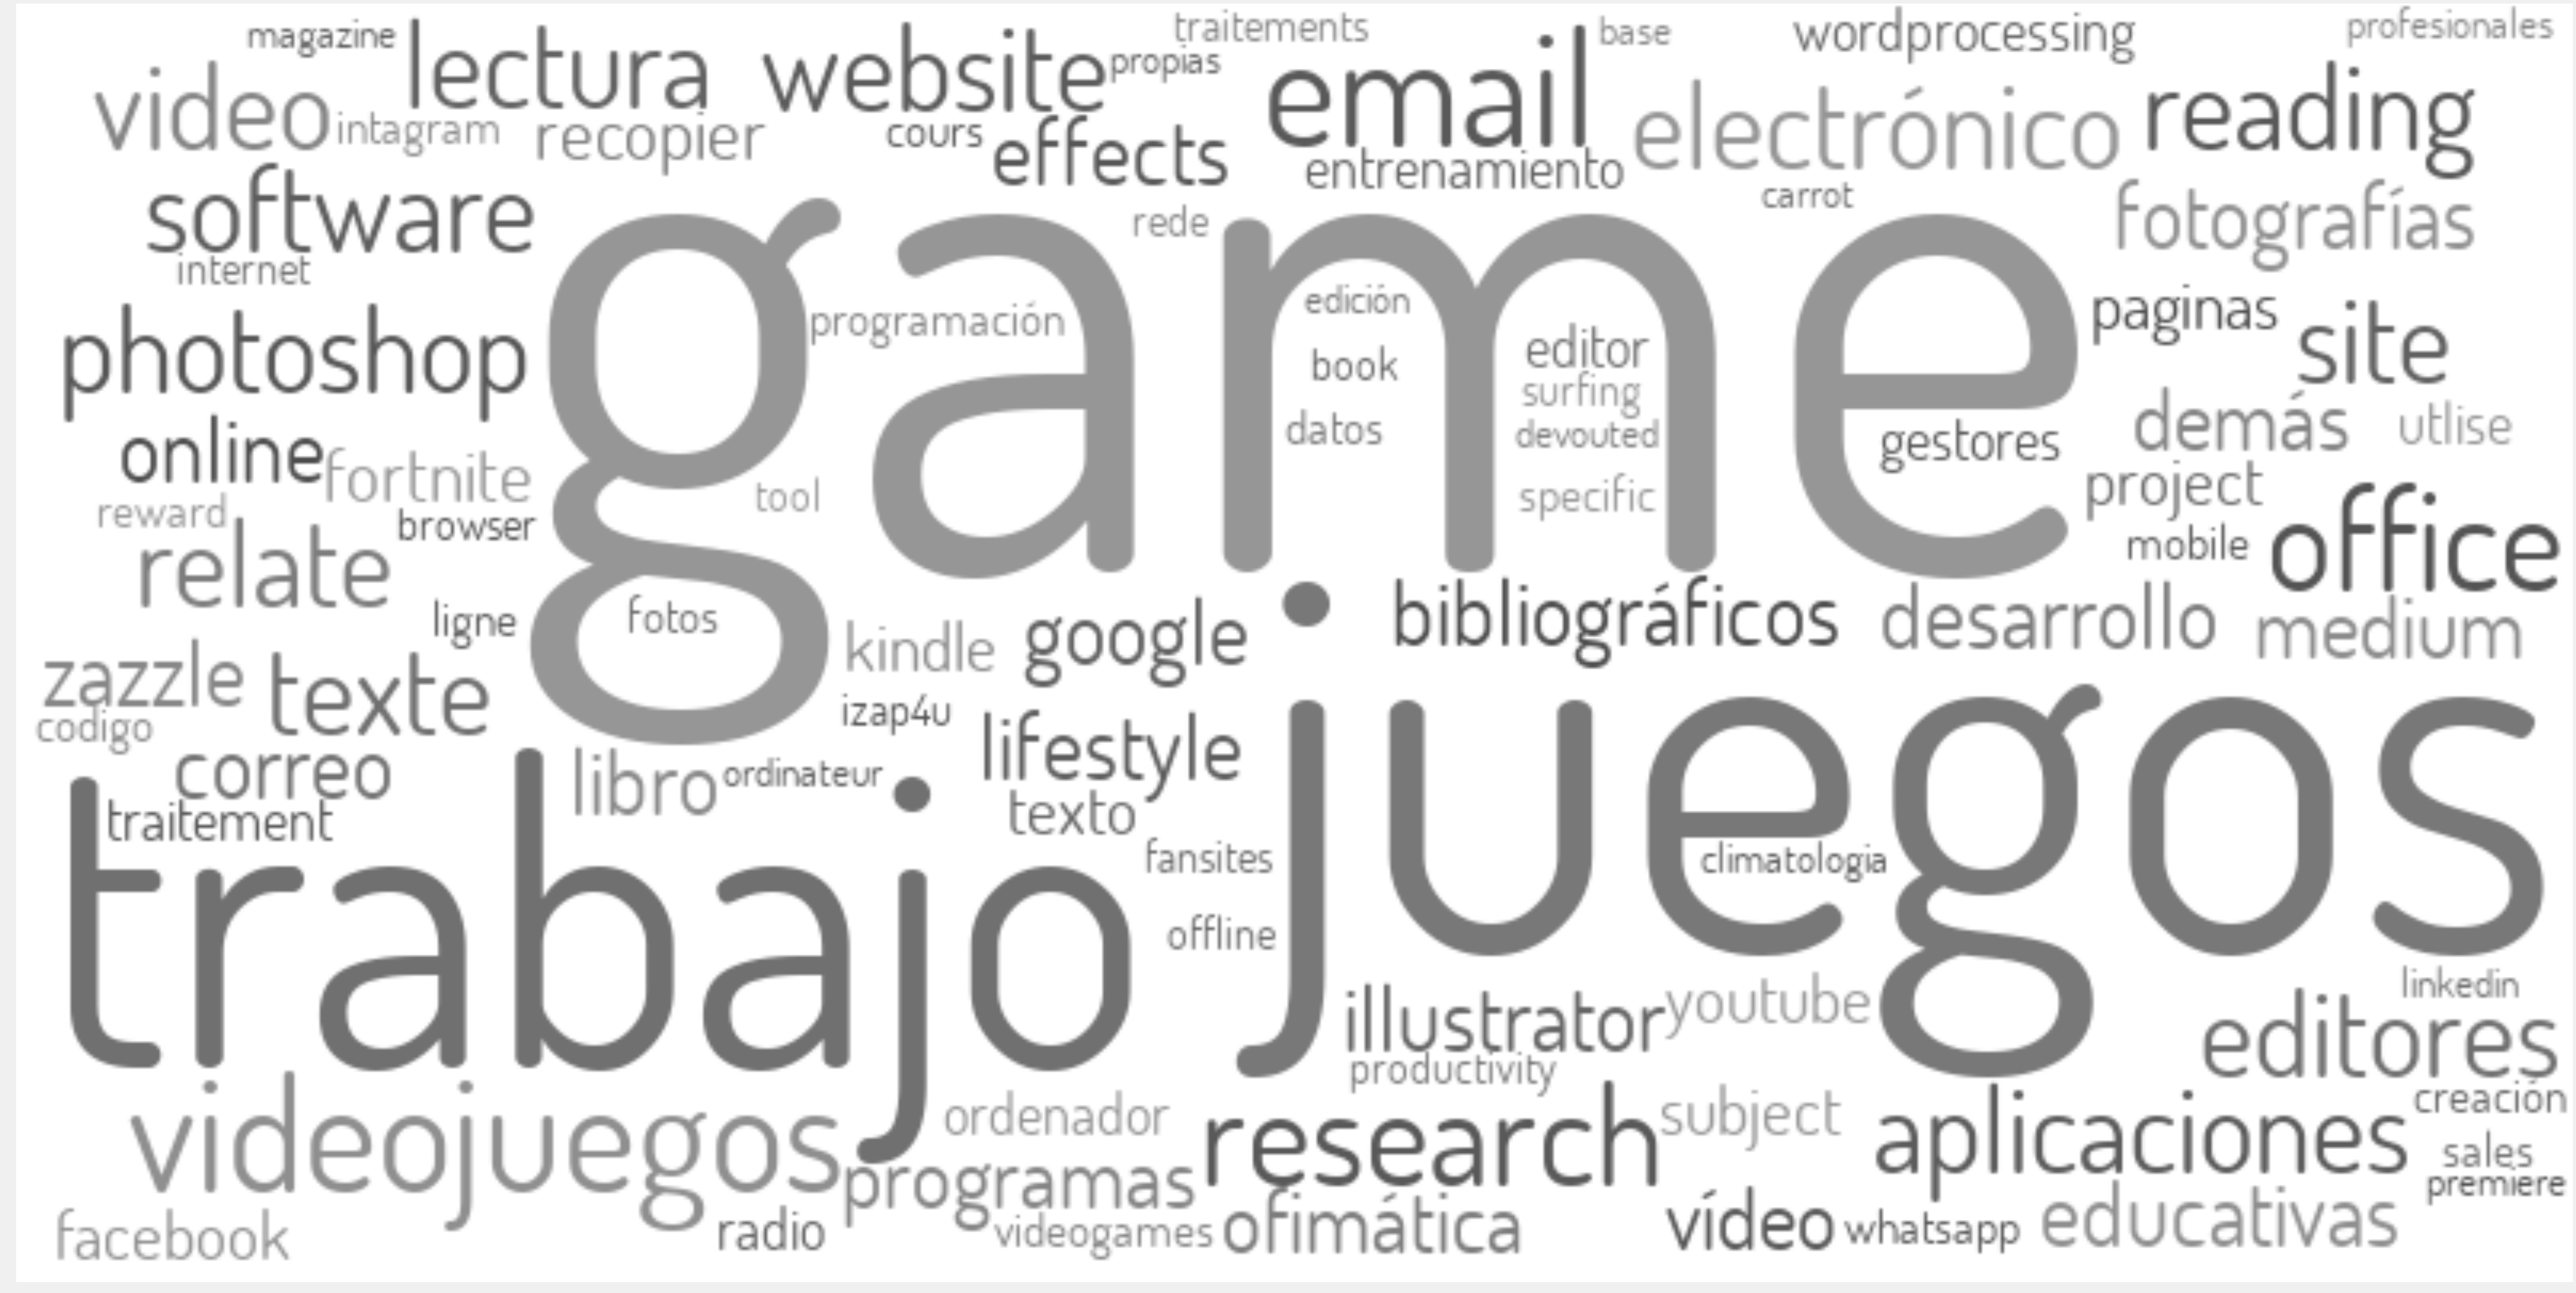

In [12]:
visualize_text_responses_esp(dataframe_all_text_esp, '¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [Otro]')

Describiendo la variable: Si has contestado Sí a la pregunta anterior, indica cuál.
Número de respuestas: 140 


Wordcloud


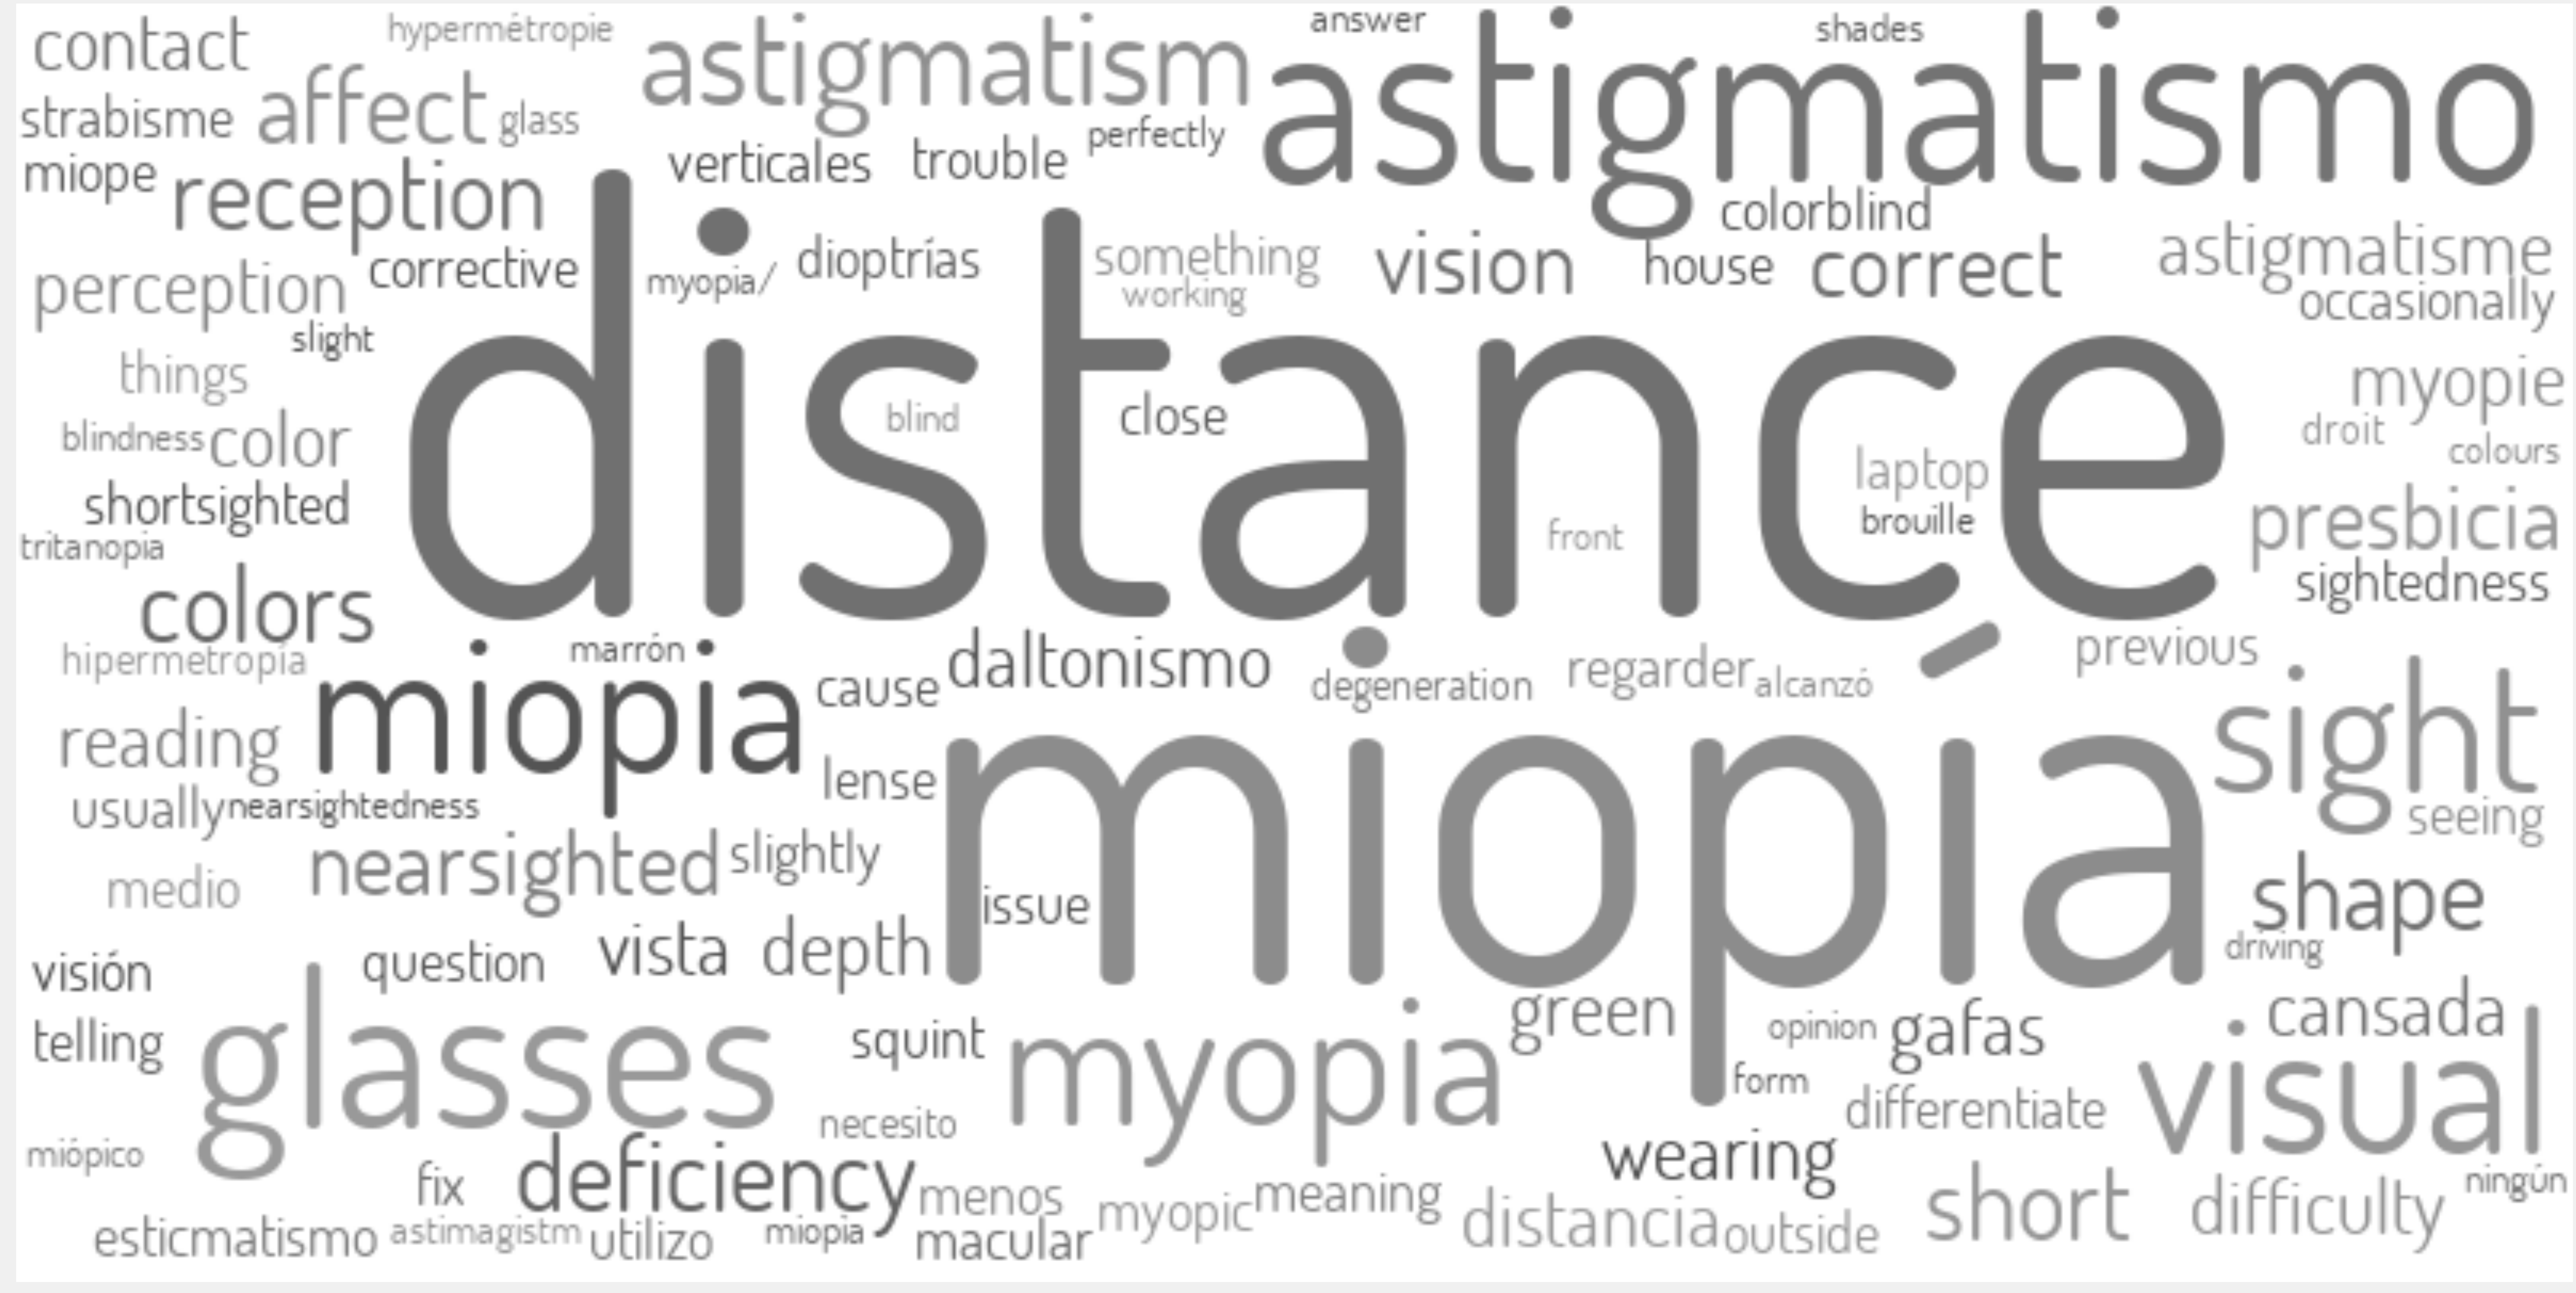

In [13]:
visualize_text_responses_esp(dataframe_all_text_esp, 'Si has contestado Sí a la pregunta anterior, indica cuál.')

In [14]:
compare_reception_images_multiple_resp_esp(dataframe_all_esp, get_reception_image_multiple_items_esp(), '¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [Otro]', [
                                           'Netflix, <br>HBO, etc.', 'Whatsapp, <br>Facebook Messenger, etc.', 'Google Photos, <br>iPhoto, etc.', 'Facebook, <br>Instagram, <br>Twitter, etc.', 'Youtube, <br>Vimeo, etc.'])

In [15]:
# compare_reception_images_multiple_resp_esp(dataframe_all_esp, get_reception_image_multiple_items_en(), 'What kind of applications do you use on your computer/ tablet/ mobile? (Multiple answer) [Other]', ['Netflix, <br>HBO, etc.', 'Whatsapp, <br>Facebook Messenger, etc.', 'Google Photos, <br>iPhoto, etc.', 'Facebook, <br>Instagram, <br>Twitter, etc.', 'Youtube, <br>Vimeo, etc.'])